# 理解K近邻

### 目标
在本章中，我们将了解k近邻（kNN）算法的原理。

### 理论
kNN是可用于监督学习的最简单的分类算法之一。这个想法是在特征空间中搜索测试数据的最近邻。我们将用下面的图片来研究它。

![](data/knn_theory.png)

在图像中，有两个族，蓝色正方形和红色三角形。我们称每一种为**类**。他们的房屋显示在他们的城镇地图中，我们称之为特征空间。 *（你可以将要素空间视为投影所有数据的空间。例如，考虑一个2D坐标空间。每个数据都有两个要素，x和y坐标。你可以在2D坐标空间中表示此数据，对吧？现在假设如果有三个要素，则需要3D空间；现在考虑N个要素，需要N维空间，对吗？这个N维空间就是其要素空间。在我们的图像中，你可以将其视为2D情况。有两个功能）*。

现在有一个新成员进入城镇并创建了一个新房屋，显示为绿色圆圈。他应该被添加到这些蓝色/红色家族之一中。我们称该过程为**分类**。我们所做的？由于我们正在处理kNN，因此让我们应用此算法。

一种方法是检查谁是他的最近邻。从图像中可以明显看出它是红色三角形家族。因此，他也被添加到了红色三角形中。此方法简称为“**最近邻**”，因为分类仅取决于最近邻。

但这是有问题的。红三角可能是最近的。但是，如果附近有很多蓝色方块怎么办？然后，蓝色方块在该地区的权重比红色三角更大。因此，仅检查最接近的一个是不够的。相反，我们检查一些k近邻的族。那么，无论谁占多数，新样本都属于那个族。在我们的图像中，让我们取k=3，即3个最近族。他有两个红色和一个蓝色（有两个等距的蓝色，但是由于k = 3，我们只取其中一个），所以他又应该加入红色家族。但是，如果我们取k=7怎么办？然后，他有5个蓝色族和2个红色族。太好了！！现在，他应该加入蓝色族。因此，所有这些都随k的值而变化。更有趣的是，如果k=4怎么办？他有2个红色邻居和2个蓝色邻居。这是一个平滑！因此最好将k作为奇数。由于分类取决于k个最近的邻居，因此该方法称为**k近邻**。

同样，在kNN中，我们确实在考虑k个邻居，但我们对所有人都给予同等的重视，对吧？这公平吗？例如，以k=4的情况为例。我们说这是平局。但是请注意，这两个红色族比其他两个蓝色族离他更近。因此，他更应该被添加到红色。那么我们如何用数学解释呢？我们根据每个家庭到新来者的距离来给他们一些权重。对于那些靠近他的人，权重增加，而那些远离他的人，权重减轻。然后，我们分别添加每个族的总权重。谁得到的总权重最高，新样本归为那一族。这称为**modified kNN**。

那么你在这里看到的一些重要内容是什么？
- 你需要了解镇上所有房屋的信息，对吗？因为，我们必须检查新样本到所有现有房屋的距离，以找到最近的邻居。如果有许多房屋和家庭，则需要大量的内存，并且需要更多的时间进行计算。
- 几乎没有时间进行任何形式的训练或准备。

现在让我们在OpenCV中看到它。

### OpenCV中的kNN
就像上面一样，我们将在这里做一个简单的例子，有两个族（类）。然后在下一章中，我们将做一个更好的例子。

因此，在这里，我们将红色系列标记为**Class-0**（因此用0表示），将蓝色系列标记为**Class-1**（用1表示）。我们创建25个族或25个训练数据，并将它们标记为0类或1类。我们借助Numpy中的Random Number Generator来完成所有这些工作。

然后我们在Matplotlib的帮助下对其进行绘制。红色系列显示为红色三角形，蓝色系列显示为蓝色正方形。

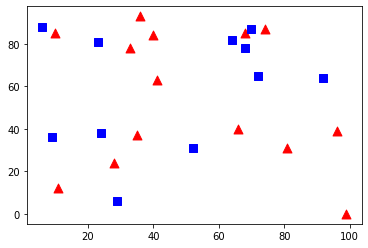

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 包含(x,y)值的25个已知/训练数据的特征集
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)

# 用数字0和1分别标记红色或蓝色
responses = np.random.randint(0,2,(25,1)).astype(np.float32)

# 取红色族并绘图
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')

# 取蓝色族并绘图
blue = trainData[responses.ravel()==1]

plt.scatter(blue[:,0],blue[:,1],80,'b','s')
plt.show()

你会得到与我们的第一张图片相似的东西。由于你使用的是随机数生成器，因此每次运行代码都将获得不同的数据。

接下来启动kNN算法，并传递trainData和响应以训练kNN（它会构建搜索树）。

然后，我们将在OpenCV中的kNN的帮助下将一个新样本带入一个族并将其分类。在进入kNN之前，我们需要了解测试数据（新样本数据）上的知识。我们的数据应为浮点数组，其大小为$number\ of\ testdata\times number\ of\ features$。然后我们找到新加入的最近邻。我们可以指定我们想要多少个邻居。它返回： 

1. 给新样本的标签取决于我们之前看到的kNN理论。如果要使用“最近邻居”算法，只需指定k=1即可，其中k是邻居数。
2. k最近邻的标签。
3. 衡量新加入到每个最近邻的相应距离。

因此，让我们看看它是如何工作的。新样本被标记为绿色。

result:  [[0.]]

neighbours:  [[0. 0. 0.]]

distance:  [[197. 221. 292.]]



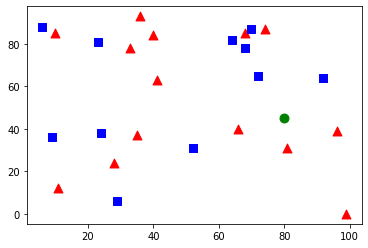

In [2]:
plt.scatter(red[:,0],red[:,1],80,'r','^')
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)

plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')

knn = cv.ml.KNearest_create()

knn.train(trainData, cv.ml.ROW_SAMPLE, responses)

ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)

print( "result:  {}\n".format(results) )
print( "neighbours:  {}\n".format(neighbours) )
print( "distance:  {}\n".format(dist) )

plt.show()

如下的结果仅供参考，你的执行结果将与下面的例子不同：

```python
result:  [[ 1.]]
neighbours:  [[ 1.  1.  1.]]
distance:  [[ 53.  58.  61.]]
```

它说我们的新样本有3个近邻，全部来自Blue家族。因此，他被标记为蓝色家庭。从下面的图可以明显看出：

![](data/knn_simple.png)

如果你有大量数据，则可以将其作为数组传递。还获得了相应的结果作为数组。

In [3]:
# 5个新加入样本
newcomers = np.random.randint(0,100,(5,2)).astype(np.float32)

# 结果包含5个标签
ret, results,neighbours,dist = knn.findNearest(newcomers, 3)
print(results)
print(neighbours)
print(dist)


[[0.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 1. 0.]
 [1. 0. 0.]]
[[2.500e+01 1.000e+03 1.165e+03]
 [4.000e+00 6.100e+01 1.530e+02]
 [1.000e+00 2.900e+02 3.490e+02]
 [3.200e+01 3.970e+02 4.360e+02]
 [2.320e+02 5.930e+02 7.250e+02]]


### 附加资源
1. NPTEL关于模式识别的注释，第11章

### 练习